Notebook to analyse and link to the municipalities the data regarding soil and climate

**Requirements:** geopandas, pandas, matplotlib

In [100]:
# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import geopandas as gpd
import pandas as pd

# Read files and checks

## Shapefile with soil properties

In [102]:
path_to_municipalities_soil = './soil_data/shapefile municipalities_soil/municipalities_soil.shp'

In [103]:
municipalities_soil = gpd.read_file(path_to_municipalities_soil)
municipalities_soil.head()

,CCA_2,District,Municipali,CaCO3_coun,CaCO3_mean,CaCO3_medi,CaCO3_stde,CN_count,CN_mean,CN_median,...,N_stdev,P_count,P_mean,P_median,P_stdev,pH_count,pH_mean,pH_median,pH_stdev,geometry
0,0705,Évora,Évora,5164.0,11.156007,0.000000,18.450520,5164.0,11.309097,11.241041,...,0.239362,5164.0,18.367848,18.258904,8.616713,5164.0,6.096658,6.074847,0.308197,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,0701,Évora,Alandroal,2082.0,16.432846,2.498584,26.755894,2082.0,10.941017,10.794536,...,0.304004,2082.0,9.674017,9.455447,5.401974,2082.0,6.089001,6.113493,0.247398,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,0702,Évora,Arraiolos,2710.0,8.331089,0.000000,14.961646,2710.0,11.672756,11.623805,...,0.209804,2710.0,15.007509,13.759467,8.637344,2710.0,5.990712,5.997008,0.205906,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,0703,Évora,Borba,568.0,43.019513,20.105740,56.110975,568.0,11.198196,10.982209,...,0.298087,568.0,10.459600,10.324636,5.806801,568.0,6.477992,6.327326,0.544822,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,0704,Évora,Estremoz,2047.0,25.280467,0.950433,37.258551,2047.0,11.820409,11.512837,...,0.330895,2047.0,9.686767,9.356781,6.265495,2047.0,6.164190,6.070422,0.481164,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."


Rename columns for CaCO3 to have complete name of statistics

In [104]:
cols_to_rename = {'CaCO3_coun': 'CaCO3_count',  'CaCO3_medi': 'CaCO3_median', 'CaCO3_stde': 'CaCO3_stdev'}
municipalities_soil.rename(columns=cols_to_rename, inplace=True)

In [105]:
description_soil = municipalities_soil.describe()
description_soil

,CaCO3_count,CaCO3_mean,CaCO3_median,CaCO3_stdev,CN_count,CN_mean,CN_median,CN_stdev,N_count,N_mean,N_median,N_stdev,P_count,P_mean,P_median,P_stdev,pH_count,pH_mean,pH_median,pH_stdev
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,1246.978417,26.662406,20.187438,23.566685,1246.946043,14.286225,14.135120,1.726892,1246.953237,1.700274,1.658383,0.408132,1246.978417,17.528319,16.948973,7.437024,1246.946043,5.781619,5.760319,0.353025
std,1124.822357,29.424491,30.312028,15.693099,1124.838379,2.227829,2.318180,0.548028,1124.841185,0.453111,0.450331,0.175334,1124.822357,7.228032,7.704473,1.851203,1124.838379,0.542594,0.568290,0.107768
min,27.000000,0.858802,0.000000,2.491999,27.000000,10.109032,10.063775,0.575286,27.000000,0.564628,0.530012,0.126861,27.000000,1.365395,0.000000,2.277507,27.000000,4.923223,4.891536,0.150299
25%,526.250000,7.674920,0.000000,12.324900,526.250000,12.320235,12.007854,1.413005,526.250000,1.396384,1.366987,0.282975,526.250000,12.155444,11.439029,6.362781,526.250000,5.292260,5.241026,0.276536
50%,888.000000,16.467996,7.784686,19.447264,888.000000,14.533672,14.293465,1.729169,888.000000,1.600869,1.552172,0.395123,888.000000,17.404512,16.367515,7.319517,888.000000,5.698562,5.692397,0.337388
75%,1587.250000,33.454342,25.743368,30.821354,1587.250000,16.208565,16.180738,2.028830,1587.250000,2.094386,2.061052,0.505221,1587.250000,22.454243,21.933220,8.620052,1587.250000,6.153627,6.105204,0.411635
max,6783.000000,174.955114,186.370209,85.842297,6783.000000,19.019662,20.105214,3.489399,6783.000000,3.443069,3.200284,1.283641,6783.000000,41.664858,41.033440,13.304542,6783.000000,7.267271,7.312079,0.745915


The count columns are not all exactly the same but they are really similar. We can keep only one.

In [106]:
cols_with_count = ['CaCO3_count', 'CN_count', 'N_count', 'P_count', 'pH_count']

In [107]:
# Check they are not the same
check = True
for i in range(len(cols_with_count) - 1):
    check = municipalities_soil[cols_with_count[i]].equals(municipalities_soil[cols_with_count[i+1]])
print(check)

False


In [108]:
municipalities_soil['count'] = municipalities_soil['CaCO3_count']

In [109]:
municipalities_soil.drop(cols_with_count, axis=1, inplace=True)

Check on descriptive statistics

In [110]:
cols_with_mean_soil = [col for col in municipalities_soil.columns if 'mean' in col]

In [111]:
print(description_soil.loc['min', cols_with_mean_soil])
print(description_soil.loc['max', cols_with_mean_soil])

CaCO3_mean     0.858802
CN_mean       10.109032
N_mean         0.564628
P_mean         1.365395
pH_mean        4.923223
Name: min, dtype: float64
CaCO3_mean    174.955114
CN_mean        19.019662
N_mean          3.443069
P_mean         41.664858
pH_mean         7.267271
Name: max, dtype: float64


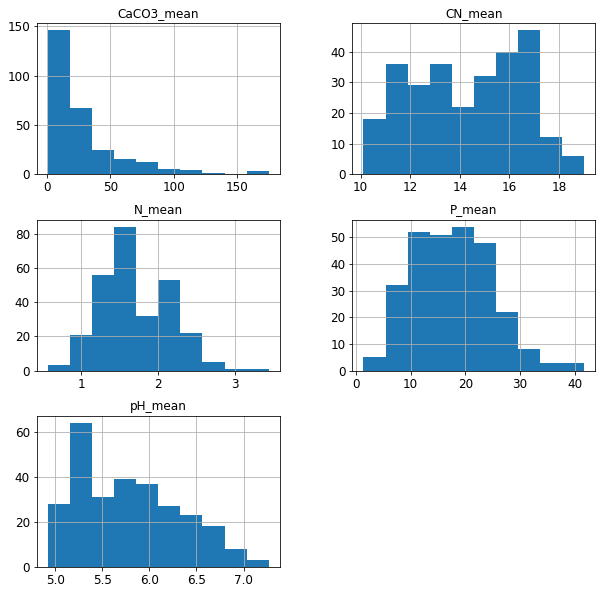

In [112]:
municipalities_soil[cols_with_mean_soil].hist(figsize=(10,10))
plt.show()

Seems no major problem is present

## Shapefile with climate properties

In [113]:
path_to_municipalities_climate = './climate_data/shapefile municipalities_climate/municipalities_climate.shp'

In [114]:
municipalities_climate = gpd.read_file(path_to_municipalities_climate)
municipalities_climate.head()

,CCA_2,District,Municipali,mt_count,pr_count,1995_mt_me,1995_mt_st,1995_pr_me,1995_pr_st,1996_mt_me,...,2016_pr_st,2017_mt_me,2017_mt_st,2017_pr_me,2017_pr_st,2018_mt_me,2018_mt_st,2018_pr_me,2018_pr_st,geometry
0,0705,Évora,Évora,13.0,13.0,1705.632484,21.531901,8622.923340,339.974102,1711.518085,...,141.587089,1646.060669,16.545284,5691.615497,98.408532,1666.392794,17.707006,4365.846229,150.986071,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,0701,Évora,Alandroal,6.0,6.0,1725.449748,16.486152,7525.333333,314.529863,1721.496155,...,187.857073,1682.027893,14.781930,5168.999593,297.927925,1706.952067,17.906260,3846.666585,209.251938,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,0702,Évora,Arraiolos,6.0,6.0,1685.054728,13.275095,9108.165527,251.300952,1697.016541,...,136.984307,1627.782043,9.346325,5908.999593,75.331157,1650.495748,11.187448,4630.833008,133.652880,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,0703,Évora,Borba,2.0,2.0,1640.185730,3.456482,8374.000000,110.000977,1642.987793,...,112.000732,1623.431641,4.009155,5576.000244,137.000732,1640.490479,5.692993,4148.999878,71.000122,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,0704,Évora,Estremoz,5.0,5.0,1652.168164,21.417788,8722.400000,145.568238,1658.494458,...,136.682678,1622.848779,11.235247,5773.000098,103.990671,1641.132764,14.197324,4298.999902,78.737944,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."


In [115]:
municipalities_climate.describe()

,mt_count,pr_count,1995_mt_me,1995_mt_st,1995_pr_me,1995_pr_st,1996_mt_me,1996_mt_st,1996_pr_me,1996_pr_st,...,2016_pr_me,2016_pr_st,2017_mt_me,2017_mt_st,2017_pr_me,2017_pr_st,2018_mt_me,2018_mt_st,2018_pr_me,2018_pr_st
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,3.447781,3.447781,1566.960596,35.496051,12197.537770,503.503574,1577.685012,34.970394,8844.605701,274.818122,...,6724.951780,223.810943,1522.412278,21.174552,8714.300891,255.291596,1552.927950,25.057257,6442.893085,179.920083
std,2.941166,2.941166,163.445113,31.319153,3648.188011,461.337153,163.465438,30.393474,2416.367556,257.742093,...,1886.469413,189.634493,110.361930,18.666719,2884.595382,210.066549,114.699404,21.719848,2171.042171,145.815048
min,0.084877,0.084877,1091.531433,0.000000,5570.665690,0.000000,1111.090271,0.000000,4428.667155,0.000000,...,3253.000244,0.000000,1237.893066,0.000000,4542.000488,0.000000,1225.683899,0.000000,3102.000610,0.000000
25%,2.000000,2.000000,1455.549210,14.097891,9336.446211,162.469807,1456.619724,14.670993,7067.016114,98.480964,...,5417.461792,82.625570,1443.576319,7.535450,6169.250061,97.351767,1469.413406,9.372239,4628.708435,75.579291
50%,2.000000,2.000000,1598.417441,24.028623,11842.709833,350.641190,1614.979263,24.060673,8712.483166,176.998432,...,6249.777493,147.647919,1503.860451,14.949273,8187.563573,193.230288,1545.480054,17.914238,5881.306653,135.941156
75%,5.000000,5.000000,1704.448984,50.208206,14661.448099,717.870428,1717.209652,49.023320,9911.822043,373.304497,...,7852.421536,340.915183,1610.783368,30.845546,11010.002197,353.247925,1644.682191,35.682350,8150.873474,255.309531
max,18.000000,18.000000,1811.000732,190.656503,22460.546668,2097.996094,1804.967651,185.396431,17670.881618,1343.622349,...,12100.999023,910.642183,1767.244995,101.346378,15054.999023,1038.978855,1804.567383,119.321169,11980.388725,747.688117


Correct values modified by the warping tool in QGIS.

In [116]:
cols_pr = [col for col in municipalities_climate.columns if ('pr' in col and col != 'pr_count')]
cols_mt = [col for col in municipalities_climate.columns if ('mt' in col and col != 'mt_count')]

In [117]:
municipalities_climate[cols_pr] = municipalities_climate[cols_pr] / 10
municipalities_climate[cols_mt] = municipalities_climate[cols_mt] / 100

In [118]:
description_climate = municipalities_climate.describe()
description_climate

,mt_count,pr_count,1995_mt_me,1995_mt_st,1995_pr_me,1995_pr_st,1996_mt_me,1996_mt_st,1996_pr_me,1996_pr_st,...,2016_pr_me,2016_pr_st,2017_mt_me,2017_mt_st,2017_pr_me,2017_pr_st,2018_mt_me,2018_mt_st,2018_pr_me,2018_pr_st
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,3.447781,3.447781,15.669606,0.354961,1219.753777,50.350357,15.776850,0.349704,884.460570,27.481812,...,672.495178,22.381094,15.224123,0.211746,871.430089,25.529160,15.529280,0.250573,644.289309,17.992008
std,2.941166,2.941166,1.634451,0.313192,364.818801,46.133715,1.634654,0.303935,241.636756,25.774209,...,188.646941,18.963449,1.103619,0.186667,288.459538,21.006655,1.146994,0.217198,217.104217,14.581505
min,0.084877,0.084877,10.915314,0.000000,557.066569,0.000000,11.110903,0.000000,442.866715,0.000000,...,325.300024,0.000000,12.378931,0.000000,454.200049,0.000000,12.256839,0.000000,310.200061,0.000000
25%,2.000000,2.000000,14.555492,0.140979,933.644621,16.246981,14.566197,0.146710,706.701611,9.848096,...,541.746179,8.262557,14.435763,0.075355,616.925006,9.735177,14.694134,0.093722,462.870844,7.557929
50%,2.000000,2.000000,15.984174,0.240286,1184.270983,35.064119,16.149793,0.240607,871.248317,17.699843,...,624.977749,14.764792,15.038605,0.149493,818.756357,19.323029,15.454801,0.179142,588.130665,13.594116
75%,5.000000,5.000000,17.044490,0.502082,1466.144810,71.787043,17.172097,0.490233,991.182204,37.330450,...,785.242154,34.091518,16.107834,0.308455,1101.000220,35.324792,16.446822,0.356824,815.087347,25.530953
max,18.000000,18.000000,18.110007,1.906565,2246.054667,209.799609,18.049677,1.853964,1767.088162,134.362235,...,1210.099902,91.064218,17.672450,1.013464,1505.499902,103.897885,18.045674,1.193212,1198.038872,74.768812


Check on descriptive statistics

In [119]:
cols_with_mean_climate = [col for col in municipalities_climate.columns if '_me' in col]
cols_with_mt_mean_climate = [col for col in cols_with_mean_climate if 'mt' in col]
cols_with_pr_mean_climate = [col for col in cols_with_mean_climate if 'pr' in col]

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


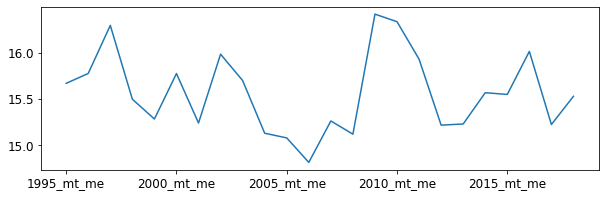

In [120]:
description_climate.loc['mean', cols_with_mt_mean_climate].plot(figsize=(10,3))
plt.show()

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


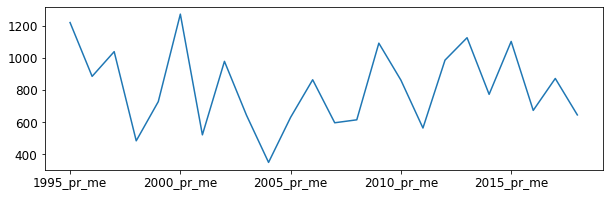

In [121]:
description_climate.loc['mean', cols_with_pr_mean_climate].plot(figsize=(10,3))
plt.show()

# Manipulation for ABM database of climate data

In [6]:
out_file = "municipalities_climate_for_abm.csv"

In [141]:
municipalities_climate_abm_raw = municipalities_climate.drop(['geometry', 'District', 'CCA_2'], axis=1)

In [142]:
municipalities_climate_abm_raw.rename(columns={'Municipali': 'Municipality'}, inplace=True)

In [143]:
municipalities_climate_abm_raw.set_index('Municipality', inplace=True)

In [144]:
municipalities_climate_abm_raw.drop(['mt_count', 'pr_count'], axis=1, inplace=True)

In [145]:
st_columns = [col for col in municipalities_climate_abm_raw.columns if 'st' in col]
municipalities_climate_abm_raw.drop(st_columns, axis=1, inplace=True)

In [146]:
municipalities_climate_abm_raw.head()

,1995_mt_me,1995_pr_me,1996_mt_me,1996_pr_me,1997_mt_me,1997_pr_me,1998_mt_me,1998_pr_me,1999_mt_me,1999_pr_me,...,2014_mt_me,2014_pr_me,2015_mt_me,2015_pr_me,2016_mt_me,2016_pr_me,2017_mt_me,2017_pr_me,2018_mt_me,2018_pr_me
Municipality,,,,,,,,,,,,,,,,,,,,,
Évora,17.056325,862.292334,17.115181,734.861512,17.570320,814.815366,16.878969,351.407709,16.528505,609.369250,...,16.716792,523.361523,16.815388,649.600008,17.286027,492.961505,16.460607,569.161550,16.663928,436.584623
Alandroal,17.254497,752.533333,17.214962,685.766699,17.732375,751.333472,16.952224,303.933346,16.628781,566.149984,...,17.264610,455.700024,17.311438,566.300000,17.728577,422.199992,16.820279,516.899959,17.069521,384.666659
Arraiolos,16.850547,910.816553,16.970165,778.866659,17.440815,837.300008,16.724814,365.400008,16.420311,606.216642,...,16.562327,556.133350,16.650574,650.983317,17.119790,487.599984,16.277820,590.899959,16.504957,463.083301
Borba,16.401857,837.400000,16.429878,746.700098,16.950299,794.849976,16.193759,340.099963,15.844127,578.149951,...,16.581820,496.649951,16.624992,615.050073,17.114042,449.200024,16.234316,557.600024,16.404905,414.899988
Estremoz,16.521682,872.240000,16.584945,762.460029,17.093676,812.320010,16.349864,350.519961,16.008088,588.700029,...,16.545556,521.160020,16.603259,632.799951,17.090485,461.680000,16.228488,577.300010,16.411328,429.899990


From this, I want to create a MultiIndex object whose first index is the municipality and the second is the year, with one column for mt mean and one for pr mean.

In [147]:
municipalities = municipalities_climate_abm_raw.index.tolist()
years = [i for i in range(1995, 2019)]

In [202]:
municipalities_climate_abm = pd.MultiIndex.from_product([municipalities, years], names=['Municipality', 'Year'])

In [203]:
municipalities_climate_abm = municipalities_climate_abm.to_frame()

In [204]:
municipalities_climate_abm.drop(['Municipality', 'Year'], axis=1, inplace=True)

In [205]:
column_variables = ['mt', 'pr']
municipalities_climate_abm[column_variables] = ""

In [206]:
cols_raw = municipalities_climate_abm_raw.columns.to_list()

for munic in municipalities:
    for year in years:
        for prop in column_variables:
            for col in cols_raw:
                if str(year) in col and prop in col:
                    corresponding_col = col
            value = municipalities_climate_abm_raw.loc[munic, corresponding_col]
            municipalities_climate_abm.loc[(munic, year), prop] = value

In [207]:
municipalities_climate_abm.rename(columns={'mt': 'Mean temperature', 'pr': 'Precipitation sum'}, inplace=True)

In [208]:
municipalities_climate_abm.head()

Mean temperature Precipitation sum
Municipality Year                                   
Évora        1995          17.0563           862.292
             1996          17.1152           734.862
             1997          17.5703           814.815
             1998           16.879           351.408
             1999          16.5285           609.369

In [210]:
municipalities_climate_abm.to_csv(out_file)

To read the file as the same format:

In [7]:
read_file = pd.read_csv(out_file, index_col=['Municipality', 'Year'])
read_file.head()

Mean temperature  Precipitation sum
Municipality Year                                     
Évora        1995         17.056325         862.292334
             1996         17.115181         734.861512
             1997         17.570320         814.815366
             1998         16.878969         351.407709
             1999         16.528505         609.369250